In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.models import Sequential
import keras as k


import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("abalone/abalone.data", header=None)

In [3]:
columns = ["Sex","Length","Diameter","Height","Whole_weight","Shucked_weight","Viscera_weight","Shell_weight","Rings"]

In [4]:
data.columns = columns

In [5]:
data.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [43]:
X,y = data.iloc[:,1:].values, data.iloc[:,0]

In [44]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)
y

array([2, 2, 0, ..., 2, 0, 2])

In [58]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [59]:
x_train, x_val, y_train, y_val = train_test_split(X, y , test_size=0.5, random_state=1, shuffle=True, stratify=y)

In [60]:
X.shape

(4177, 8)

In [71]:
model = Sequential()
model.add(k.layers.Dense(50, activation="relu",input_shape=(8,)))

model.add(k.layers.Dense(75, activation="relu"))
model.add(k.layers.Dense(50, activation="relu"))


model.add(k.layers.Dense(3, activation="softmax"))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [72]:
# history = model.fit(x_train,y_train, validation_data=(x_val, y_val), epochs=100)
history = model.fit(X, y,validation_split=0.5, epochs=100)

Epoch 1/100
66/66 [==============================] - 1s 6ms/step - loss: 0.9304 - accuracy: 0.4962 - val_loss: 0.8772 - val_accuracy: 0.5371
Epoch 2/100
66/66 [==============================] - 0s 3ms/step - loss: 0.8566 - accuracy: 0.5503 - val_loss: 0.8617 - val_accuracy: 0.5409
Epoch 3/100
66/66 [==============================] - 0s 3ms/step - loss: 0.8478 - accuracy: 0.5603 - val_loss: 0.8546 - val_accuracy: 0.5534
Epoch 4/100
66/66 [==============================] - 0s 3ms/step - loss: 0.8436 - accuracy: 0.5565 - val_loss: 0.8531 - val_accuracy: 0.5625
Epoch 5/100
66/66 [==============================] - 0s 3ms/step - loss: 0.8348 - accuracy: 0.5623 - val_loss: 0.8491 - val_accuracy: 0.5519
Epoch 6/100
66/66 [==============================] - 0s 3ms/step - loss: 0.8295 - accuracy: 0.5618 - val_loss: 0.8502 - val_accuracy: 0.5711
Epoch 7/100
66/66 [==============================] - 0s 3ms/step - loss: 0.8257 - accuracy: 0.5575 - val_loss: 0.8459 - val_accuracy: 0.5558
Epoch 8/100
6

In [73]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

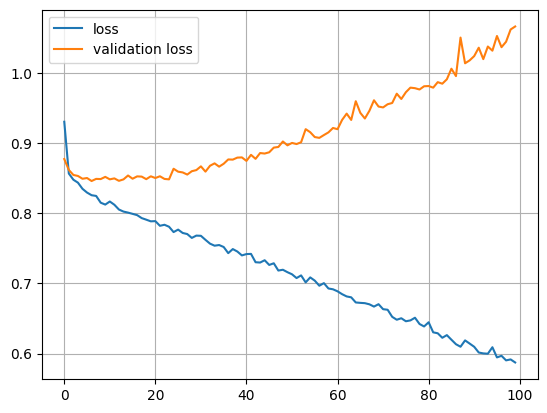

In [77]:
plt.plot(loss, label="loss")
plt.plot(val_loss, label = "validation loss")
plt.legend()
plt.grid()
plt.show();

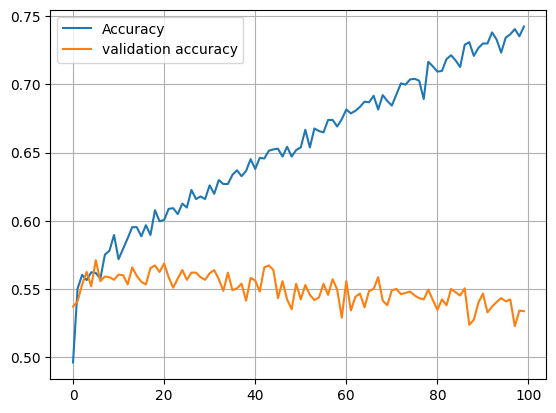

In [75]:
plt.plot(acc, label="Accuracy")
plt.plot(val_acc, label = "validation accuracy")
plt.legend()
plt.grid()
plt.show();

### Optimized Model:

In [111]:
from keras.optimizers import Nadam, Adam
from keras.initializers import HeUniform
from keras.regularizers import l1_l2
import keras_tuner as kt

In [105]:
model = Sequential()
model.add(k.layers.Dense(50, activation="relu",input_shape=(8,), kernel_initializer=HeUniform()))

model.add(k.layers.Dense(75, activation="relu"))
model.add(k.layers.Dense(50, activation="relu"))


model.add(k.layers.Dense(3, activation="softmax"))

model.compile(optimizer= Nadam(learning_rate=0.0009), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [106]:
history_opt = model.fit(X, y,validation_split=0.5, epochs=100, batch_size=32)

Epoch 1/100
66/66 [==============================] - 2s 7ms/step - loss: 0.9048 - accuracy: 0.5244 - val_loss: 0.8676 - val_accuracy: 0.5428
Epoch 2/100
66/66 [==============================] - 0s 4ms/step - loss: 0.8486 - accuracy: 0.5694 - val_loss: 0.8591 - val_accuracy: 0.5486
Epoch 3/100
66/66 [==============================] - 0s 4ms/step - loss: 0.8439 - accuracy: 0.5637 - val_loss: 0.8646 - val_accuracy: 0.5366
Epoch 4/100
66/66 [==============================] - 0s 4ms/step - loss: 0.8354 - accuracy: 0.5699 - val_loss: 0.8539 - val_accuracy: 0.5553
Epoch 5/100
66/66 [==============================] - 0s 4ms/step - loss: 0.8276 - accuracy: 0.5800 - val_loss: 0.8543 - val_accuracy: 0.5476
Epoch 6/100
66/66 [==============================] - 0s 4ms/step - loss: 0.8173 - accuracy: 0.5848 - val_loss: 0.8629 - val_accuracy: 0.5390
Epoch 7/100
66/66 [==============================] - 0s 4ms/step - loss: 0.8216 - accuracy: 0.5829 - val_loss: 0.8501 - val_accuracy: 0.5543
Epoch 8/100
6

In [107]:
loss = history_opt.history["loss"]
val_loss = history_opt.history["val_loss"]
acc = history_opt.history["accuracy"]
val_acc = history_opt.history["val_accuracy"]

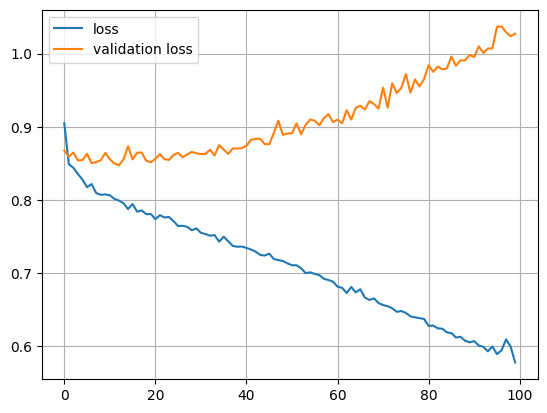

In [108]:
plt.plot(loss, label="loss")
plt.plot(val_loss, label = "validation loss")
plt.legend()
plt.grid()
plt.show();

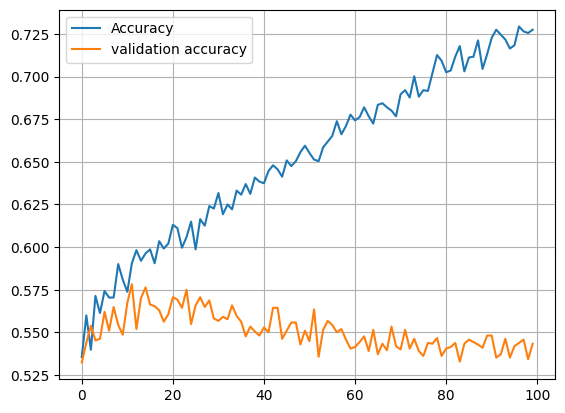

In [104]:
plt.plot(acc, label="Accuracy")
plt.plot(val_acc, label = "validation accuracy")
plt.legend()
plt.grid()
plt.show();

In [114]:
def optimized_model(hp):
    model = Sequential()

    model.add(k.layers.Dense(
        units = hp.Int("units_1", min_value=32, max_value=256, step=32),
        activation= hp.Choice("activation_1", values=["relu", "tanh"]),
        kernel_initializer=hp.Choice("initializer_1", values=["glorot_uniform", "he_normal"]),
        kernel_regularizer=l1_l2(l1=hp.Float("l1_1", 0.0, 0.01, step=0.001),
                                 l2=hp.Float("l2_1", 0.0, 0.01, step=0.001)),
    ))

        
    model.add(k.layers.Dense(
        units=hp.Int('units_2', min_value=32, max_value=256, step=32),
        activation=hp.Choice('activation_2', values=['relu', 'tanh']),
        kernel_initializer=hp.Choice('initializer_2', values=['glorot_uniform', 'he_normal']),
        kernel_regularizer=l1_l2(l1=hp.Float('l1_2', 0.0, 0.01, step=0.001), 
                                l2=hp.Float('l2_2', 0.0, 0.01, step=0.001))
    ))

    # Output layer (3 classes: Male, Female, Infant)
    model.add(k.layers.Dense(3, activation='softmax'))

    model.compile(optimizer=Adam(learning_rate=hp.Float("learning_rate", 1e-4, 1e-2, sampling="LOG")),
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    
    return model

In [115]:
tuner = kt.RandomSearch(
    optimized_model,
    objective="val_accuracy",
    max_trials=10,
    executions_per_trial=1,
)

In [116]:
tuner.search(X,y, validation_split=0.5, epochs=100, batch_size=32)

Trial 10 Complete [00h 00m 29s]
val_accuracy: 0.5500239133834839

Best val_accuracy So Far: 0.5619913935661316
Total elapsed time: 00h 05m 02s


In [119]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_hps

In [120]:
best_model = tuner.hypermodel.build(best_hps)

In [122]:
history = best_model.fit(X,y, validation_split=0.5, epochs=100, batch_size=32)

Epoch 1/100
66/66 [==============================] - 1s 8ms/step - loss: 5.6232 - accuracy: 0.5206 - val_loss: 4.4406 - val_accuracy: 0.5562
Epoch 2/100
66/66 [==============================] - 0s 4ms/step - loss: 3.7598 - accuracy: 0.5273 - val_loss: 3.1740 - val_accuracy: 0.5491
Epoch 3/100
66/66 [==============================] - 0s 4ms/step - loss: 2.7738 - accuracy: 0.5340 - val_loss: 2.4334 - val_accuracy: 0.5577
Epoch 4/100
66/66 [==============================] - 0s 4ms/step - loss: 2.2050 - accuracy: 0.5489 - val_loss: 2.0109 - val_accuracy: 0.5390
Epoch 5/100
66/66 [==============================] - 0s 4ms/step - loss: 1.8671 - accuracy: 0.5388 - val_loss: 1.7378 - val_accuracy: 0.5457
Epoch 6/100
66/66 [==============================] - 0s 4ms/step - loss: 1.6337 - accuracy: 0.5455 - val_loss: 1.5456 - val_accuracy: 0.5337
Epoch 7/100
66/66 [==============================] - 0s 4ms/step - loss: 1.4572 - accuracy: 0.5489 - val_loss: 1.3917 - val_accuracy: 0.5376
Epoch 8/100
6

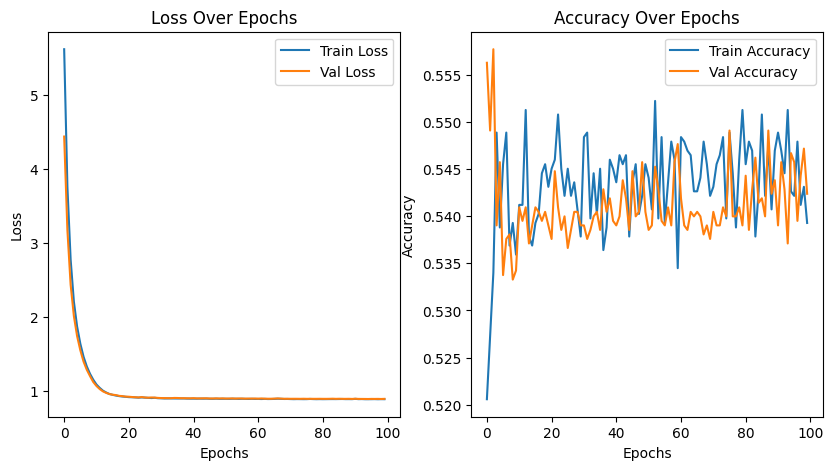

In [123]:
plt.figure(figsize=(10, 5))

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.legend()

# Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()

# Save plot
# plt.savefig('abalone-c.png')
plt.show()